In [55]:
from phi.torch.flow import *
import numpy as np

<Figure size 1200x500 with 1 Axes>

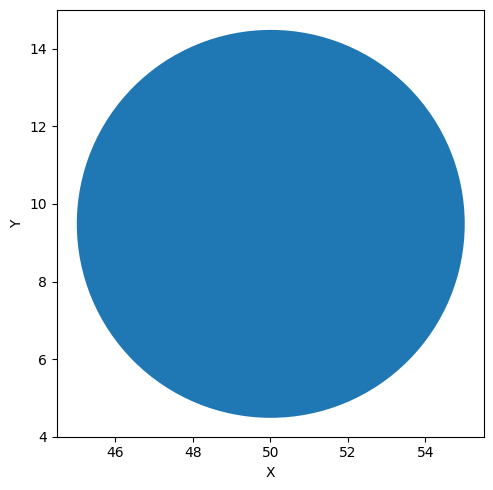

In [2]:
inflow = Sphere(x=50, y=9.5, radius=5)
plot(inflow)

In [450]:
smoke = CenteredGrid(values=1, boundary=ZERO_GRADIENT, bounds=Box(x=0, y=1), resolution=spatial(x=10, y=10))
smoke.data.native('x,y')
type(smoke.data.native('x,y'))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], device='cuda:0')

In [491]:
v0 = StaggeredGrid(values=0, bounds=Box(x=(0, 1), y=(0, 1), z=(0, 1)), resolution=spatial(x=3, y=3, z=3),
                   extrapolation=ZERO_GRADIENT)

vx = np.ones((11, 10, 10))
vy = np.ones((10, 11, 10))
vz = np.ones((10, 10, 11))

# v0.staggered_tensor()

for com in v0.vector:
    ntv = com.data.native('x,y,z')
    ntv[0, 0, 0] = 1

for com in v0.vector:
    ntv = com.data.native('x,y,z')
    print(ntv[0, 0, 0])

TypeError: 'tuple' object does not support item assignment

In [567]:
vx = tensor(np.zeros((11, 10, 10)), spatial("x,y,z"))
vy = tensor(np.zeros((10, 11, 10)), spatial("x,y,z"))
vz = tensor(np.zeros((10, 10, 11)), spatial("x,y,z"))

v0 = StaggeredGrid(values=1, bounds=Box(x=(0, 1), y=(0, 1), z=(0, 1)), resolution=spatial(x=10, y=10, z=10),
                   extrapolation=ZERO_GRADIENT)
v1 = StaggeredGrid(values=math.stack([vx, vy, vz], dual(vector='x,y,z')), bounds=Box(x=(0, 1), y=(0, 1), z=(0, 1)),
                   resolution=spatial(x=10, y=10, z=10), extrapolation=ZERO_GRADIENT)
print(v0)
print(v1)

Grid faces[(~vectorᵈ=x,y,z, xˢ=~(x=11, y=10, z=10), yˢ=~(x=10, y=11, z=10), zˢ=~(x=10, y=10, z=11)) const 1.0, ext=zero-gradient]
Grid faces[(~vectorᵈ=x,y,z, xˢ=~(x=11, y=10, z=10), yˢ=~(x=10, y=11, z=10), zˢ=~(x=10, y=10, z=11)) const 1.0, ext=zero-gradient]


<Figure size 1200x500 with 2 Axes>

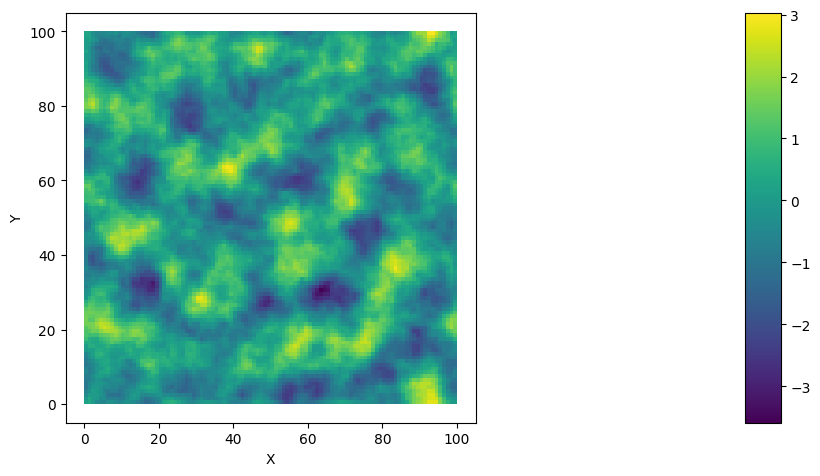

In [564]:
grid = CenteredGrid(x=100, y=100)
grid = field.resample(Noise(), to=grid)
plot(grid)